In [280]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import copy

In [281]:
df = pd.read_csv('Causal Inference Project/possession_detail.csv')

C:\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3071: DtypeWarning: Columns (1,2,7) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [282]:
###### for first half only #####
#df = df[df['elapsed']==45]
#df

###### for full match #####
df = df[df['elapsed']==90]
df


##### for second half only #####
#df_poss_45 = df[df['elapsed']==45]['match_id'].tolist()
#df_poss_90 = df[df['elapsed']==90]['match_id'].tolist()
#relevant_games = (sorted(list(set(df_poss_45) & set(df_poss_90))))
#print(len(relevant_games))
#df_relevant_games = df[df['match_id'] in relevant_games]
#df_relevant_games = df.loc[df['match_id'].isin(relevant_games)]
#print(len(df_relevant_games['match_id'].unique()))

#df_poss_45 = df_relevant_games[df_relevant_games['elapsed']==45]
#df_poss_90 = df_relevant_games[df_relevant_games['elapsed']==90]

#df_poss_45 = df_poss_45.drop_duplicates(subset=['match_id'], keep='first', inplace=False, ignore_index=False)
#df_poss_90 = df_poss_90.drop_duplicates(subset=['match_id'], keep='first', inplace=False, ignore_index=False)

#df_poss_45 = df_poss_45['homepos'].tolist()
#df_poss_90 = df_poss_90['homepos'].tolist()

#poss_second_half = []
#for i in range(len(df_poss_45)):
#    poss_second_half.append(2*df_poss_90[i] - df_poss_45[i])
#poss_second_half

#df = df_relevant_games.drop_duplicates(subset=['match_id'], keep='first', inplace=False, ignore_index=False)
#df['homepos'] = poss_second_half
#df['awaypos'] = 100 - df['homepos']
#df


,awaypos,card_type,comment,del,elapsed,elapsed_plus,event_incident_typefk,goal_type,homepos,id,...,match_id,n,pos_x,pos_y,possession,sortorder,stats,subtype,type,value
3,45.0,NaN,55,NaN,90,5.0,352,NaN,55.0,379575,...,1729,252,NaN,NaN,NaN,1,NaN,possession,special,NaN
7,34.0,NaN,66,NaN,90,3.0,352,NaN,66.0,375909,...,1730,199,NaN,NaN,NaN,2,NaN,possession,special,NaN
11,54.0,NaN,46,NaN,90,4.0,352,NaN,46.0,378069,...,1731,264,NaN,NaN,NaN,1,NaN,possession,special,NaN
15,48.0,NaN,52,NaN,90,1.0,352,NaN,52.0,377621,...,1732,212,NaN,NaN,NaN,1,NaN,possession,special,NaN
19,48.0,NaN,52,NaN,90,NaN,352,NaN,52.0,379254,...,1733,96,NaN,NaN,NaN,2,NaN,possession,special,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34794,42.0,NaN,58,NaN,90,3.0,352,NaN,58.0,4951067,...,24552,522,NaN,NaN,NaN,13,NaN,possession,special,NaN
34798,51.0,NaN,49,NaN,90,3.0,352,NaN,49.0,4958005,...,24553,408,NaN,NaN,NaN,10,NaN,possession,special,NaN
34802,50.0,NaN,50,NaN,90,NaN,352,NaN,50.0,4949695,...,24554,399,NaN,NaN,NaN,0,NaN,possession,special,NaN
34806,48.0,NaN,52,NaN,90,1.0,352,NaN,52.0,4960149,...,24555,414,NaN,NaN,NaN,3,NaN,possession,special,NaN


In [283]:
df_matches = pd.read_csv('Causal Inference Project/match.csv')
df_matches = df_matches[df_matches['possession'].notna()]
df_matches = df_matches[df_matches['possession'] != '<possession />']
df_matches


,id,country_id,league_id,season,stage,date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,...,SJA,VCH,VCD,VCA,GBH,GBD,GBA,BSH,BSD,BSA
1728,1729,1729,1729,2008/2009,1,2008-08-17 00:00:00,489042,10260,10261,1,...,10.00,1.28,5.5,12.00,1.30,4.75,10.0,1.29,4.50,11.00
1729,1730,1729,1729,2008/2009,1,2008-08-16 00:00:00,489043,9825,8659,1,...,12.00,1.25,6.0,13.00,1.22,5.50,13.0,1.22,5.00,13.00
1730,1731,1729,1729,2008/2009,1,2008-08-16 00:00:00,489044,8472,8650,0,...,1.73,5.50,3.8,1.65,5.00,3.40,1.7,4.50,3.40,1.73
1731,1732,1729,1729,2008/2009,1,2008-08-16 00:00:00,489045,8654,8528,2,...,3.75,1.90,3.5,4.35,1.91,3.25,4.0,1.91,3.25,3.80
1732,1733,1729,1729,2008/2009,1,2008-08-17 00:00:00,489046,10252,8456,4,...,3.75,1.90,3.5,4.35,1.91,3.25,4.0,1.91,3.30,3.75
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24552,24553,21518,21518,2015/2016,9,2015-10-25 00:00:00,2030167,9906,10267,2,...,NaN,1.57,4.0,7.00,NaN,NaN,NaN,NaN,NaN,NaN
24553,24554,21518,21518,2015/2016,9,2015-10-24 00:00:00,2030168,9864,9783,2,...,NaN,2.30,3.4,3.40,NaN,NaN,NaN,NaN,NaN,NaN
24554,24555,21518,21518,2015/2016,9,2015-10-26 00:00:00,2030169,8315,9869,3,...,NaN,1.55,4.2,7.00,NaN,NaN,NaN,NaN,NaN,NaN
24555,24556,21518,21518,2015/2016,9,2015-10-24 00:00:00,2030170,7878,8603,1,...,NaN,2.30,3.4,3.30,NaN,NaN,NaN,NaN,NaN,NaN


In [284]:
df_merge = pd.merge(df_matches, df, left_on='id', right_on='match_id')
df_merge = df_merge[df_merge['league_id'] != 19694]
df_merge

,id_x,country_id,league_id,season,stage,date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,...,match_id,n,pos_x,pos_y,possession_y,sortorder,stats,subtype,type,value
0,1729,1729,1729,2008/2009,1,2008-08-17 00:00:00,489042,10260,10261,1,...,1729,252,NaN,NaN,NaN,1,NaN,possession,special,NaN
1,1730,1729,1729,2008/2009,1,2008-08-16 00:00:00,489043,9825,8659,1,...,1730,199,NaN,NaN,NaN,2,NaN,possession,special,NaN
2,1731,1729,1729,2008/2009,1,2008-08-16 00:00:00,489044,8472,8650,0,...,1731,264,NaN,NaN,NaN,1,NaN,possession,special,NaN
3,1732,1729,1729,2008/2009,1,2008-08-16 00:00:00,489045,8654,8528,2,...,1732,212,NaN,NaN,NaN,1,NaN,possession,special,NaN
4,1733,1729,1729,2008/2009,1,2008-08-17 00:00:00,489046,10252,8456,4,...,1733,96,NaN,NaN,NaN,2,NaN,possession,special,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5882,24552,21518,21518,2015/2016,9,2015-10-25 00:00:00,2030166,8581,8560,0,...,24552,522,NaN,NaN,NaN,13,NaN,possession,special,NaN
5883,24553,21518,21518,2015/2016,9,2015-10-25 00:00:00,2030167,9906,10267,2,...,24553,408,NaN,NaN,NaN,10,NaN,possession,special,NaN
5884,24554,21518,21518,2015/2016,9,2015-10-24 00:00:00,2030168,9864,9783,2,...,24554,399,NaN,NaN,NaN,0,NaN,possession,special,NaN
5885,24555,21518,21518,2015/2016,9,2015-10-26 00:00:00,2030169,8315,9869,3,...,24555,414,NaN,NaN,NaN,3,NaN,possession,special,NaN


dominated the ball and won: 0.44550940717074905
dominated the ball but tied: 0.24423145189918352
number of games with unequal possession in halftime: 5634
average goal difference: 0.3906638267660632


Text(0.5, 1.0, 'Goal Difference - Dominating Team')

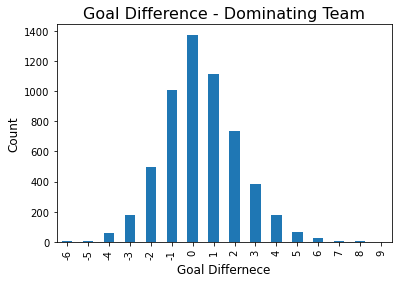

In [285]:
poss_won = 0
poss_tie = 0
goal_difference = 0
goal_difference_list = []
all_games_with_no_equal_poss = 0
for i, row in df_merge.iterrows():
    home_goals = row['home_team_goal'] 
    away_goals = row['away_team_goal']
    home_poss =  row['homepos']
    away_poss =  row['awaypos']
    if home_poss > away_poss:
        goal_difference += home_goals - away_goals
        goal_difference_list.append(home_goals - away_goals)
    if home_poss < away_poss:
        goal_difference += away_goals - home_goals
        goal_difference_list.append(away_goals - home_goals)
    if home_goals > away_goals and home_poss > away_poss:
        poss_won +=1
    elif home_goals < away_goals and home_poss < away_poss:
        poss_won +=1
    if home_poss != away_poss and home_goals == away_goals:
        poss_tie +=1
    if home_poss != away_poss:
        all_games_with_no_equal_poss +=1
print("dominated the ball and won:",poss_won/all_games_with_no_equal_poss)
print("dominated the ball but tied:",poss_tie/all_games_with_no_equal_poss)
print("number of games with unequal possession in halftime:",all_games_with_no_equal_poss)
print("average goal difference:", goal_difference/ all_games_with_no_equal_poss)
#plt.hist(goal_difference_list, bins = 20)
df_goal_difference = pd.DataFrame({'diff':goal_difference_list})
s = df_goal_difference['diff'].value_counts()
s.reindex(np.intersect1d(np.array([range(-9,10)]).astype(int), s.index)).plot.bar()
plt.xlabel('Goal Differnece', fontsize = 12, color='black')
plt.ylabel('Count', fontsize = 12, color='black')
plt.title('Goal Difference - Dominating Team', fontsize = 16, color='black')
#s.plot(kind='bar')


In [286]:
df_merge 

,id_x,country_id,league_id,season,stage,date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,...,match_id,n,pos_x,pos_y,possession_y,sortorder,stats,subtype,type,value
0,1729,1729,1729,2008/2009,1,2008-08-17 00:00:00,489042,10260,10261,1,...,1729,252,NaN,NaN,NaN,1,NaN,possession,special,NaN
1,1730,1729,1729,2008/2009,1,2008-08-16 00:00:00,489043,9825,8659,1,...,1730,199,NaN,NaN,NaN,2,NaN,possession,special,NaN
2,1731,1729,1729,2008/2009,1,2008-08-16 00:00:00,489044,8472,8650,0,...,1731,264,NaN,NaN,NaN,1,NaN,possession,special,NaN
3,1732,1729,1729,2008/2009,1,2008-08-16 00:00:00,489045,8654,8528,2,...,1732,212,NaN,NaN,NaN,1,NaN,possession,special,NaN
4,1733,1729,1729,2008/2009,1,2008-08-17 00:00:00,489046,10252,8456,4,...,1733,96,NaN,NaN,NaN,2,NaN,possession,special,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5882,24552,21518,21518,2015/2016,9,2015-10-25 00:00:00,2030166,8581,8560,0,...,24552,522,NaN,NaN,NaN,13,NaN,possession,special,NaN
5883,24553,21518,21518,2015/2016,9,2015-10-25 00:00:00,2030167,9906,10267,2,...,24553,408,NaN,NaN,NaN,10,NaN,possession,special,NaN
5884,24554,21518,21518,2015/2016,9,2015-10-24 00:00:00,2030168,9864,9783,2,...,24554,399,NaN,NaN,NaN,0,NaN,possession,special,NaN
5885,24555,21518,21518,2015/2016,9,2015-10-26 00:00:00,2030169,8315,9869,3,...,24555,414,NaN,NaN,NaN,3,NaN,possession,special,NaN


In [287]:
print(df_merge['league_id'].unique())
print(df_merge['season'].value_counts())
print(df_merge['league_id'].value_counts())


[ 1729  4769  7809 10257 13274 21518]
2015/2016    1624
2014/2015    1330
2009/2010     736
2008/2009     628
2010/2011     543
2011/2012     520
2013/2014     270
2012/2013     227
Name: season, dtype: int64
1729     2306
21518    1092
10257    1008
7809      707
4769      535
13274     230
Name: league_id, dtype: int64


In [288]:
df_copy = copy.deepcopy(df_merge)
df_copy = df_copy[abs(df_copy['homepos'] -50) >= 10]
df_copy['homepos']

1       66.0
9       60.0
10      62.0
33      40.0
50      40.0
        ... 
5872    64.0
5875    37.0
5877    61.0
5879    69.0
5886    62.0
Name: homepos, Length: 1811, dtype: float64

############## 60% or more ##############
dominated the ball and won: 0.4892324682495859
dominated the ball but tied: 0.2435118718939812
number of games with unequal possession in halftime: 1811
average goal difference: 0.6996134732192159
1811


Text(0.5, 1.0, 'Goal Difference - Dominating Team')

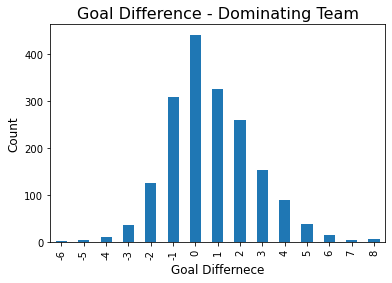

In [289]:
poss_won = 0
poss_tie = 0
goal_difference = 0
goal_difference_list = []
all_games_with_no_equal_poss = 0
for i, row in df_copy.iterrows():
    home_goals = row['home_team_goal'] 
    away_goals = row['away_team_goal']
    home_poss =  row['homepos']
    away_poss =  row['awaypos']
    if home_poss > away_poss:
        goal_difference += home_goals - away_goals
        goal_difference_list.append(home_goals - away_goals)
    if home_poss < away_poss:
        goal_difference += away_goals - home_goals
        goal_difference_list.append(away_goals - home_goals)
    if home_goals > away_goals and home_poss > away_poss:
        poss_won +=1
    elif home_goals < away_goals and home_poss < away_poss:
        poss_won +=1
    if home_poss != away_poss and home_goals == away_goals:
        poss_tie +=1
    if home_poss != away_poss:
        all_games_with_no_equal_poss +=1

print("############## 60% or more ##############")
print("dominated the ball and won:",poss_won/all_games_with_no_equal_poss)
print("dominated the ball but tied:",poss_tie/all_games_with_no_equal_poss)
print("number of games with unequal possession in halftime:",all_games_with_no_equal_poss)
print("average goal difference:", goal_difference/ all_games_with_no_equal_poss)
print(all_games_with_no_equal_poss)
#plt.hist(goal_difference_list, bins = 20)
df_goal_difference = pd.DataFrame({'diff':goal_difference_list})
s = df_goal_difference['diff'].value_counts()
s.reindex(np.intersect1d(np.array([range(-9,10)]).astype(int), s.index)).plot.bar()
plt.xlabel('Goal Differnece', fontsize = 12, color='black')
plt.ylabel('Count', fontsize = 12, color='black')
plt.title('Goal Difference - Dominating Team', fontsize = 16, color='black')
#s.plot(kind='bar')

In [290]:
# create dictionary of shot_on for each game, team(home/away) and half
dict_shot_on = {}
df_shot_on = pd.read_csv('Causal Inference Project/shoton_detail.csv')
last_match_id = 0000
for i, row in df_shot_on.iterrows():
    #if last_match_id != row['match_id']:
     #   last_match_id = row['match_id']
     #   relevant_ids = np.delete(relevant_ids, 0)
    if row['match_id'] not in dict_shot_on:
        #print(row['match_id'])
        #home_team = df_matches[df_matches['id'] == row['match_id']]['home_team_api_id']
        #print(home_team)
        #away_team = df_matches[df_matches['id'] == row['match_id']]['away_team_api_id']
        dict_shot_on[row['match_id']] = {}
    if row['team'] not in dict_shot_on[row['match_id']]:
        dict_shot_on[row['match_id']][row['team']] = {'first':0, 'second':0}
    #home_or_away = 'home_team' if row['team'] == home_team.iloc[0] else 'away_team'
    half = 'first' if row['elapsed'] <=45 else 'second'
    dict_shot_on[row['match_id']][row['team']][half] +=1
    #print(dict_shot_on)


C:\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3071: DtypeWarning: Columns (1,7,16) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [291]:
dict_shot_on

{1729: {10260.0: {'first': 6, 'second': 5},
  10261.0: {'first': 0, 'second': 1}},
 1730: {9825.0: {'first': 7, 'second': 5}, 8659.0: {'first': 0, 'second': 2}},
 1731: {8472.0: {'first': 2, 'second': 2}, 8650.0: {'first': 4, 'second': 7}},
 1732: {8654.0: {'first': 3, 'second': 2}, 8528.0: {'first': 1, 'second': 6}},
 1733: {10252.0: {'first': 4, 'second': 1}, 8456.0: {'first': 2, 'second': 7}},
 1734: {8668.0: {'first': 1, 'second': 1}, 8655.0: {'first': 4, 'second': 4}},
 1735: {8549.0: {'first': 3, 'second': 4}, 8586.0: {'first': 0, 'second': 2}},
 1736: {8559.0: {'first': 3, 'second': 2}, 10194.0: {'first': 0, 'second': 1}},
 1737: {9879.0: {'first': 4, 'second': 0}, 8667.0: {'first': 2, 'second': 3}},
 1738: {8462.0: {'first': 5, 'second': 2}, 8455.0: {'first': 5, 'second': 1}},
 1739: {10260.0: {'first': 6, 'second': 5}, 8654.0: {'first': 2, 'second': 1}},
 1740: {9825.0: {'first': 3, 'second': 6}, 8586.0: {'first': 0, 'second': 3}},
 1741: {8456.0: {'first': 3, 'second': 8}, 85

In [292]:
# create dictionary of goal for each game, team(home/away) and half
dict_goal = {}
df_goal = pd.read_csv('Causal Inference Project/goal_detail.csv')
last_match_id = 0000
for i, row in df_goal.iterrows():
    #if last_match_id != row['match_id']:
     #   last_match_id = row['match_id']
     #   relevant_ids = np.delete(relevant_ids, 0)
    if row['match_id'] not in dict_goal:
        #print(row['match_id'])
        #home_team = df_matches[df_matches['id'] == row['match_id']]['home_team_api_id']
        #print(home_team)
        #away_team = df_matches[df_matches['id'] == row['match_id']]['away_team_api_id']
        dict_goal[row['match_id']] = {}
    if row['team'] not in dict_goal[row['match_id']]:
        dict_goal[row['match_id']][row['team']] = {'first':0, 'second':0}
    #home_or_away = 'home_team' if row['team'] == home_team.iloc[0] else 'away_team'
    half = 'first' if row['elapsed'] <=45 else 'second'
    dict_goal[row['match_id']][row['team']][half] +=1
    #print(dict_goal)


C:\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3071: DtypeWarning: Columns (21) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [293]:
dict_goal

{1729: {10261.0: {'first': 1, 'second': 0},
  10260.0: {'first': 1, 'second': 0}},
 1730: {9825.0: {'first': 1, 'second': 0}},
 1731: {8650.0: {'first': 0, 'second': 1}},
 1732: {8654.0: {'first': 2, 'second': 0}, 8528.0: {'first': 0, 'second': 1}},
 1733: {10252.0: {'first': 0, 'second': 4}, 8456.0: {'first': 0, 'second': 2}},
 1734: {8655.0: {'first': 1, 'second': 2}, 8668.0: {'first': 1, 'second': 1}},
 1735: {8549.0: {'first': 1, 'second': 3}},
 1736: {8559.0: {'first': 3, 'second': 0}, 10194.0: {'first': 0, 'second': 1}},
 1737: {9879.0: {'first': 1, 'second': 0}, 8667.0: {'first': 1, 'second': 1}},
 1738: {8455.0: {'first': 3, 'second': 1}},
 1739: {10260.0: {'first': 2, 'second': 0}},
 1740: {8586.0: {'first': 1, 'second': 3}, 9825.0: {'first': 1, 'second': 3}},
 1741: {8549.0: {'first': 0, 'second': 2}},
 1742: {8668.0: {'first': 0, 'second': 1}},
 1743: {8455.0: {'first': 1, 'second': 2}},
 1744: {10194.0: {'first': 0, 'second': 1}},
 1745: {8650.0: {'first': 0, 'second': 1}},

In [294]:
df_copy

,id_x,country_id,league_id,season,stage,date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,...,match_id,n,pos_x,pos_y,possession_y,sortorder,stats,subtype,type,value
1,1730,1729,1729,2008/2009,1,2008-08-16 00:00:00,489043,9825,8659,1,...,1730,199,NaN,NaN,NaN,2,NaN,possession,special,NaN
9,1739,1729,1729,2008/2009,10,2008-10-29 00:00:00,489132,10260,8654,2,...,1739,143,NaN,NaN,NaN,2,NaN,possession,special,NaN
10,1740,1729,1729,2008/2009,10,2008-10-29 00:00:00,489133,9825,8586,4,...,1740,117,NaN,NaN,NaN,4,NaN,possession,special,NaN
33,1765,1729,1729,2008/2009,12,2008-11-09 00:00:00,489158,8655,8455,0,...,1765,222,NaN,NaN,NaN,1,NaN,possession,special,NaN
50,1782,1729,1729,2008/2009,14,2008-11-22 00:00:00,489175,10252,10260,0,...,1782,221,NaN,NaN,NaN,0,NaN,possession,special,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5872,24537,21518,21518,2015/2016,7,2015-10-04 00:00:00,2030151,8370,8603,0,...,24537,497,NaN,NaN,NaN,4,NaN,possession,special,NaN
5875,24541,21518,21518,2015/2016,8,2015-10-18 00:00:00,2030155,10205,9910,1,...,24541,432,NaN,NaN,NaN,4,NaN,possession,special,NaN
5877,24546,21518,21518,2015/2016,8,2015-10-19 00:00:00,2030160,9869,7878,3,...,24546,407,NaN,NaN,NaN,2,NaN,possession,special,NaN
5879,24548,21518,21518,2015/2016,9,2015-10-25 00:00:00,2030162,8634,8372,3,...,24548,533,NaN,NaN,NaN,5,NaN,possession,special,NaN


In [295]:
shot_on_first_half_dominating = 0
shot_on_first_half_dominated = 0
shot_on_second_half_dominating = 0
shot_on_second_half_dominated = 0

goals_first_half_dominating = 0
goals_first_half_dominated = 0
goals_second_half_dominating = 0
goals_second_half_dominated = 0

num_games = 0

for i, row in df_copy.iterrows():
    num_games +=1
    home_poss =  row['homepos']
    away_poss =  row['awaypos']
    dominating = row['home_team_api_id'] if home_poss > away_poss else row['away_team_api_id']
    dominated = row['away_team_api_id'] if home_poss > away_poss else row['home_team_api_id']
    id_game = row['id_x']
    if id_game not in dict_shot_on:
        dict_shot_on[id_game]= {}
    if id_game not in dict_goal:
        dict_goal[id_game]= {}
    if dominating not in dict_shot_on[id_game]:
        dict_shot_on[id_game][dominating] = {'first':0,'second':0}
    if dominating not in dict_goal[id_game]:
        dict_goal[id_game][dominating] = {'first':0,'second':0}
        
    if dominated not in dict_shot_on[id_game]:
        dict_shot_on[id_game][dominated] = {'first':0,'second':0}
    if dominated not in dict_goal[id_game]:
        dict_goal[id_game][dominated] = {'first':0,'second':0}
        
    if dict_shot_on[id_game] and dict_goal[id_game]:
        shot_on_first_half_dominating += dict_shot_on[id_game][dominating]['first'] + dict_goal[id_game][dominating]['first']
        shot_on_second_half_dominating += dict_shot_on[id_game][dominating]['second'] + dict_goal[id_game][dominating]['second']
        shot_on_first_half_dominated += dict_shot_on[id_game][dominated]['first'] + dict_goal[id_game][dominated]['first']
        shot_on_second_half_dominated += dict_shot_on[id_game][dominated]['second'] + dict_goal[id_game][dominated]['second']
        goals_first_half_dominating +=  dict_goal[id_game][dominating]['first']
        goals_second_half_dominating +=  dict_goal[id_game][dominating]['second']
        goals_first_half_dominated += dict_goal[id_game][dominated]['first']
        goals_second_half_dominated += dict_goal[id_game][dominated]['second']
        
        #dominating_home_or_away = 'home_team_goal' if home_poss > away_poss else 'away_team_goal'
        #row[dominating_home_or_away]:

print("############## 60% or more ##############")


print("shoton first half - dominating:",shot_on_first_half_dominating/num_games)
print("shoton second half - dominating:",shot_on_second_half_dominating/num_games)

print("shoton first half - dominated:",shot_on_first_half_dominated/num_games)
print("shoton second half - dominated:",shot_on_second_half_dominated/num_games)


print("goals first half - dominating:",goals_first_half_dominating/num_games)
print("goals second half - dominating:",goals_second_half_dominating/num_games)

print("goals first half - dominated:",goals_first_half_dominated/num_games)
print("goals second half - dominated:",goals_second_half_dominated/num_games)

print(num_games)
#print("dominated the ball but tied:",poss_tie/all_games_with_no_equal_poss)
#print("number of games with unequal possession in halftime:",all_games_with_no_equal_poss)
#print("average goal difference:", goal_difference/ all_games_with_no_equal_poss)
#plt.hist(goal_difference_list, bins = 20)
#df_goal_difference = pd.DataFrame({'diff':goal_difference_list})
#s = df_goal_difference['diff'].value_counts()
#s.reindex(np.intersect1d(np.array([range(-9,10)]).astype(int), s.index)).plot.bar()
#plt.xlabel('Goal Differnece', fontsize = 12, color='black')
#plt.ylabel('Count', fontsize = 12, color='black')
#plt.title('Goal Difference - Dominating Team', fontsize = 16, color='black')
#s.plot(kind='bar')

############## 60% or more ##############
shoton first half - dominating: 4.221424627277747
shoton second half - dominating: 5.224185532854777
shoton first half - dominated: 2.3743787962451686
shoton second half - dominated: 2.689122032026505
goals first half - dominating: 0.725565985643291
goals second half - dominating: 1.1154058531198232
goals first half - dominated: 0.5698509110988405
goals second half - dominated: 0.5361678630590834
1811


In [296]:
df_copy_51 = copy.deepcopy(df_merge)
df_copy_51 = df_copy_51[abs(df_copy_51['homepos'] -50) >= 1]

############## 51% or more ##############
dominated the ball and won: 0.44566761363636365
dominated the ball but tied: 0.244140625
number of games with unequal possession in halftime: 5632
average goal difference: 0.3908025568181818
5632


Text(0.5, 1.0, 'Goal Difference - Dominating Team')

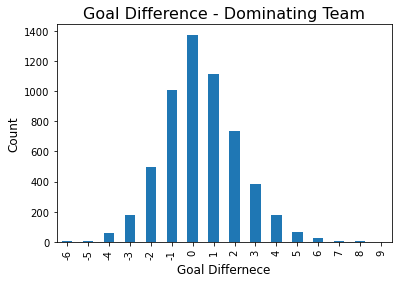

In [297]:
poss_won = 0
poss_tie = 0
goal_difference = 0
goal_difference_list = []
all_games_with_no_equal_poss = 0
for i, row in df_copy_51.iterrows():
    home_goals = row['home_team_goal'] 
    away_goals = row['away_team_goal']
    home_poss =  row['homepos']
    away_poss =  row['awaypos']
    if home_poss > away_poss:
        goal_difference += home_goals - away_goals
        goal_difference_list.append(home_goals - away_goals)
    if home_poss < away_poss:
        goal_difference += away_goals - home_goals
        goal_difference_list.append(away_goals - home_goals)
    if home_goals > away_goals and home_poss > away_poss:
        poss_won +=1
    elif home_goals < away_goals and home_poss < away_poss:
        poss_won +=1
    if home_poss != away_poss and home_goals == away_goals:
        poss_tie +=1
    if home_poss != away_poss:
        all_games_with_no_equal_poss +=1

print("############## 51% or more ##############")
print("dominated the ball and won:",poss_won/all_games_with_no_equal_poss)
print("dominated the ball but tied:",poss_tie/all_games_with_no_equal_poss)
print("number of games with unequal possession in halftime:",all_games_with_no_equal_poss)
print("average goal difference:", goal_difference/ all_games_with_no_equal_poss)
print(all_games_with_no_equal_poss)
#plt.hist(goal_difference_list, bins = 20)
df_goal_difference = pd.DataFrame({'diff':goal_difference_list})
s = df_goal_difference['diff'].value_counts()
s.reindex(np.intersect1d(np.array([range(-9,10)]).astype(int), s.index)).plot.bar()
plt.xlabel('Goal Differnece', fontsize = 12, color='black')
plt.ylabel('Count', fontsize = 12, color='black')
plt.title('Goal Difference - Dominating Team', fontsize = 16, color='black')
#s.plot(kind='bar')

In [298]:
shot_on_first_half_dominating = 0
shot_on_first_half_dominated = 0
shot_on_second_half_dominating = 0
shot_on_second_half_dominated = 0

goals_first_half_dominating = 0
goals_first_half_dominated = 0
goals_second_half_dominating = 0
goals_second_half_dominated = 0

num_games = 0

for i, row in df_copy_51.iterrows():
    num_games +=1
    home_poss =  row['homepos']
    away_poss =  row['awaypos']
    dominating = row['home_team_api_id'] if home_poss > away_poss else row['away_team_api_id']
    dominated = row['away_team_api_id'] if home_poss > away_poss else row['home_team_api_id']
    id_game = row['id_x']
    if id_game not in dict_shot_on:
        dict_shot_on[id_game]= {}
    if id_game not in dict_goal:
        dict_goal[id_game]= {}
    if dominating not in dict_shot_on[id_game]:
        dict_shot_on[id_game][dominating] = {'first':0,'second':0}
    if dominating not in dict_goal[id_game]:
        dict_goal[id_game][dominating] = {'first':0,'second':0}
        
    if dominated not in dict_shot_on[id_game]:
        dict_shot_on[id_game][dominated] = {'first':0,'second':0}
    if dominated not in dict_goal[id_game]:
        dict_goal[id_game][dominated] = {'first':0,'second':0}

    dict_shot_on[id_game][dominating]['poss'] = home_poss if home_poss > away_poss else away_poss
    dict_shot_on[id_game][dominated]['poss'] = away_poss if home_poss > away_poss else home_poss
    dict_goal[id_game][dominating]['poss'] = home_poss if home_poss > away_poss else away_poss
    dict_goal[id_game][dominated]['poss'] = away_poss if home_poss > away_poss else home_poss
    
    if dict_shot_on[id_game] and dict_goal[id_game]:
        shot_on_first_half_dominating += dict_shot_on[id_game][dominating]['first'] + dict_goal[id_game][dominating]['first']
        shot_on_second_half_dominating += dict_shot_on[id_game][dominating]['second'] + dict_goal[id_game][dominating]['second']
        shot_on_first_half_dominated += dict_shot_on[id_game][dominated]['first'] + dict_goal[id_game][dominated]['first']
        shot_on_second_half_dominated += dict_shot_on[id_game][dominated]['second'] + dict_goal[id_game][dominated]['second']
        goals_first_half_dominating +=  dict_goal[id_game][dominating]['first']
        goals_second_half_dominating +=  dict_goal[id_game][dominating]['second']
        goals_first_half_dominated += dict_goal[id_game][dominated]['first']
        goals_second_half_dominated += dict_goal[id_game][dominated]['second']
        
        #dominating_home_or_away = 'home_team_goal' if home_poss > away_poss else 'away_team_goal'
        #row[dominating_home_or_away]:


print("############## 51% or more ##############")

print("shoton first half - dominating:",shot_on_first_half_dominating/num_games)
print("shoton second half - dominating:",shot_on_second_half_dominating/num_games)

print("shoton first half - dominated:",shot_on_first_half_dominated/num_games)
print("shoton second half - dominated:",shot_on_second_half_dominated/num_games)


print("goals first half - dominating:",goals_first_half_dominating/num_games)
print("goals second half - dominating:",goals_second_half_dominating/num_games)

print("goals first half - dominated:",goals_first_half_dominated/num_games)
print("goals second half - dominated:",goals_second_half_dominated/num_games)

print(num_games)
#print("dominated the ball but tied:",poss_tie/all_games_with_no_equal_poss)
#print("number of games with unequal possession in halftime:",all_games_with_no_equal_poss)
#print("average goal difference:", goal_difference/ all_games_with_no_equal_poss)
#plt.hist(goal_difference_list, bins = 20)
#df_goal_difference = pd.DataFrame({'diff':goal_difference_list})
#s = df_goal_difference['diff'].value_counts()
#s.reindex(np.intersect1d(np.array([range(-9,10)]).astype(int), s.index)).plot.bar()
#plt.xlabel('Goal Differnece', fontsize = 12, color='black')
#plt.ylabel('Count', fontsize = 12, color='black')
#plt.title('Goal Difference - Dominating Team', fontsize = 16, color='black')
#s.plot(kind='bar')

############## 51% or more ##############
shoton first half - dominating: 3.7462713068181817
shoton second half - dominating: 4.533025568181818
shoton first half - dominated: 2.7310014204545454
shoton second half - dominated: 3.12890625
goals first half - dominating: 0.6761363636363636
goals second half - dominating: 0.9650213068181818
goals first half - dominated: 0.58984375
goals second half - dominated: 0.6416903409090909
5632


In [299]:
df_copy_70 = copy.deepcopy(df_merge)
df_copy_70 = df_copy_70[abs(df_copy_70['homepos'] -50) >= 20]

############## 70% or more ##############
dominated the ball and won: 0.5789473684210527
dominated the ball but tied: 0.2145748987854251
number of games with unequal possession in halftime: 247
average goal difference: 1.1174089068825912
247


Text(0.5, 1.0, 'Goal Difference - Dominating Team')

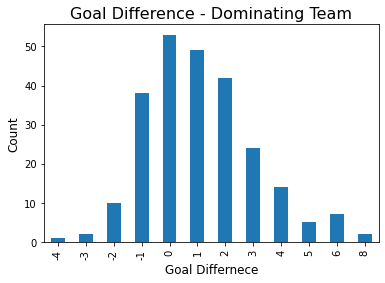

In [300]:
poss_won = 0
poss_tie = 0
goal_difference = 0
goal_difference_list = []
all_games_with_no_equal_poss = 0
for i, row in df_copy_70.iterrows():
    home_goals = row['home_team_goal'] 
    away_goals = row['away_team_goal']
    home_poss =  row['homepos']
    away_poss =  row['awaypos']
    if home_poss > away_poss:
        goal_difference += home_goals - away_goals
        goal_difference_list.append(home_goals - away_goals)
    if home_poss < away_poss:
        goal_difference += away_goals - home_goals
        goal_difference_list.append(away_goals - home_goals)
    if home_goals > away_goals and home_poss > away_poss:
        poss_won +=1
    elif home_goals < away_goals and home_poss < away_poss:
        poss_won +=1
    if home_poss != away_poss and home_goals == away_goals:
        poss_tie +=1
    if home_poss != away_poss:
        all_games_with_no_equal_poss +=1

print("############## 70% or more ##############")
        
print("dominated the ball and won:",poss_won/all_games_with_no_equal_poss)
print("dominated the ball but tied:",poss_tie/all_games_with_no_equal_poss)
print("number of games with unequal possession in halftime:",all_games_with_no_equal_poss)
print("average goal difference:", goal_difference/ all_games_with_no_equal_poss)
print(all_games_with_no_equal_poss)
#plt.hist(goal_difference_list, bins = 20)
df_goal_difference = pd.DataFrame({'diff':goal_difference_list})
s = df_goal_difference['diff'].value_counts()
s.reindex(np.intersect1d(np.array([range(-9,10)]).astype(int), s.index)).plot.bar()
plt.xlabel('Goal Differnece', fontsize = 12, color='black')
plt.ylabel('Count', fontsize = 12, color='black')
plt.title('Goal Difference - Dominating Team', fontsize = 16, color='black')
#s.plot(kind='bar')

In [301]:
shot_on_first_half_dominating = 0
shot_on_first_half_dominated = 0
shot_on_second_half_dominating = 0
shot_on_second_half_dominated = 0

goals_first_half_dominating = 0
goals_first_half_dominated = 0
goals_second_half_dominating = 0
goals_second_half_dominated = 0

num_games = 0

for i, row in df_copy_70.iterrows():
    num_games +=1
    home_poss =  row['homepos']
    away_poss =  row['awaypos']
    dominating = row['home_team_api_id'] if home_poss > away_poss else row['away_team_api_id']
    dominated = row['away_team_api_id'] if home_poss > away_poss else row['home_team_api_id']
    id_game = row['id_x']
    if id_game not in dict_shot_on:
        dict_shot_on[id_game]= {}
    if id_game not in dict_goal:
        dict_goal[id_game]= {}
    if dominating not in dict_shot_on[id_game]:
        dict_shot_on[id_game][dominating] = {'first':0,'second':0}
    if dominating not in dict_goal[id_game]:
        dict_goal[id_game][dominating] = {'first':0,'second':0}
        
    if dominated not in dict_shot_on[id_game]:
        dict_shot_on[id_game][dominated] = {'first':0,'second':0}
    if dominated not in dict_goal[id_game]:
        dict_goal[id_game][dominated] = {'first':0,'second':0}

        
    if dict_shot_on[id_game] and dict_goal[id_game]:
        shot_on_first_half_dominating += dict_shot_on[id_game][dominating]['first'] + dict_goal[id_game][dominating]['first']
        shot_on_second_half_dominating += dict_shot_on[id_game][dominating]['second'] + dict_goal[id_game][dominating]['second']
        shot_on_first_half_dominated += dict_shot_on[id_game][dominated]['first'] + dict_goal[id_game][dominated]['first']
        shot_on_second_half_dominated += dict_shot_on[id_game][dominated]['second'] + dict_goal[id_game][dominated]['second']
        goals_first_half_dominating +=  dict_goal[id_game][dominating]['first']
        goals_second_half_dominating +=  dict_goal[id_game][dominating]['second']
        goals_first_half_dominated += dict_goal[id_game][dominated]['first']
        goals_second_half_dominated += dict_goal[id_game][dominated]['second']
        
        #dominating_home_or_away = 'home_team_goal' if home_poss > away_poss else 'away_team_goal'
        #row[dominating_home_or_away]:


print("############## 70% or more ##############")

print("shoton first half - dominating:",shot_on_first_half_dominating/num_games)
print("shoton second half - dominating:",shot_on_second_half_dominating/num_games)

print("shoton first half - dominated:",shot_on_first_half_dominated/num_games)
print("shoton second half - dominated:",shot_on_second_half_dominated/num_games)


print("goals first half - dominating:",goals_first_half_dominating/num_games)
print("goals second half - dominating:",goals_second_half_dominating/num_games)

print("goals first half - dominated:",goals_first_half_dominated/num_games)
print("goals second half - dominated:",goals_second_half_dominated/num_games)

print(num_games)
#print("dominated the ball but tied:",poss_tie/all_games_with_no_equal_poss)
#print("number of games with unequal possession in halftime:",all_games_with_no_equal_poss)
#print("average goal difference:", goal_difference/ all_games_with_no_equal_poss)
#plt.hist(goal_difference_list, bins = 20)
#df_goal_difference = pd.DataFrame({'diff':goal_difference_list})
#s = df_goal_difference['diff'].value_counts()
#s.reindex(np.intersect1d(np.array([range(-9,10)]).astype(int), s.index)).plot.bar()
#plt.xlabel('Goal Differnece', fontsize = 12, color='black')
#plt.ylabel('Count', fontsize = 12, color='black')
#plt.title('Goal Difference - Dominating Team', fontsize = 16, color='black')
#s.plot(kind='bar')

############## 70% or more ##############
shoton first half - dominating: 4.6923076923076925
shoton second half - dominating: 5.834008097165992
shoton first half - dominated: 2.048582995951417
shoton second half - dominated: 1.9757085020242915
goals first half - dominating: 0.7854251012145749
goals second half - dominating: 1.319838056680162
goals first half - dominated: 0.5101214574898786
goals second half - dominated: 0.39271255060728744
247


In [302]:
df_shots_statistics = pd.DataFrame(columns = ["match_id", "team_id", "possession", "shots_on" , "shots_on_first_half","shots_on_second_half"])

i = 0
for k, v in dict_shot_on.items():
    for team_id in v.keys():
        try:
        #print(v)
            df_shots_statistics.loc[i] =([k,team_id, v[team_id]['poss'], v[team_id]['first']+v[team_id]['second'],v[team_id]['first'],v[team_id]['second']])
            i+=1
        except:
            pass 

#df_shots_statistics


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000022F733C2FA0>,
      dtype=object)

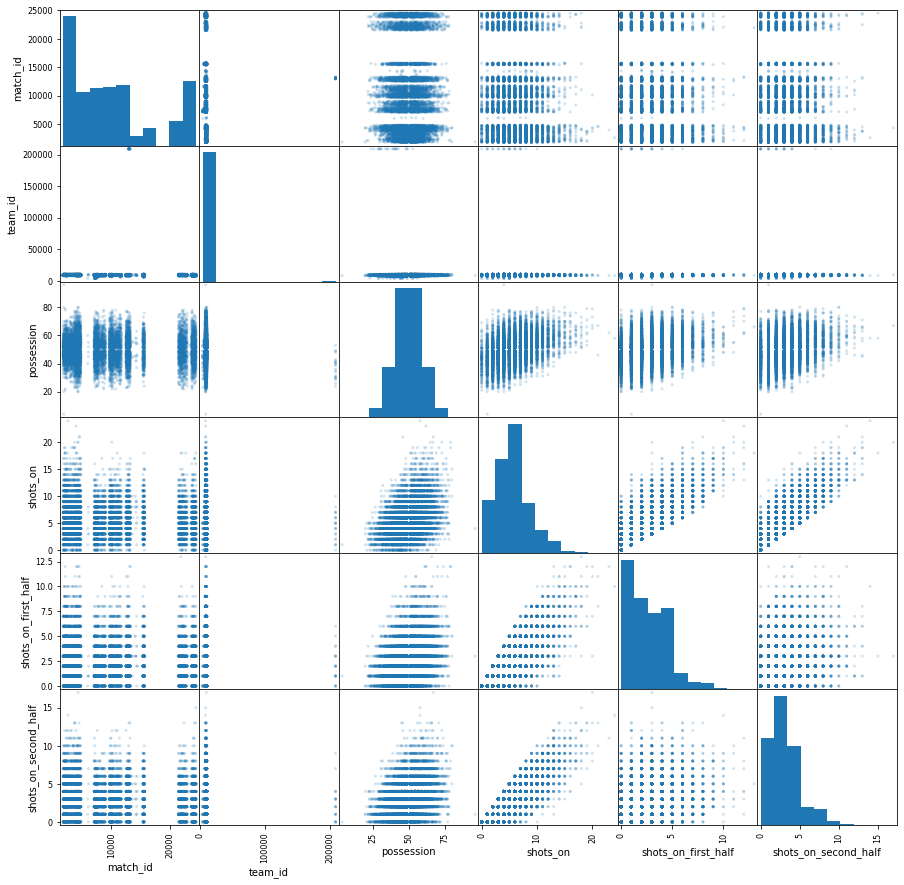

In [303]:
pd.plotting.scatter_matrix(df_shots_statistics, alpha=0.2,figsize=(15,15))                              

In [304]:
df_goals_statistics = pd.DataFrame(columns = ["match_id", "team_id", "possession", "goals" , "goals_first_half","goals_second_half"])
i = 0
for k, v in dict_goal.items():
    for team_id in v.keys():
        try:
        #print(v)
            df_goals_statistics.loc[i] =([k,team_id, v[team_id]['poss'], v[team_id]['first']+v[team_id]['second'],v[team_id]['first'],v[team_id]['second']])
            i+=1
        except:
            pass 

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000022F70C668B0>,
      dtype=object)

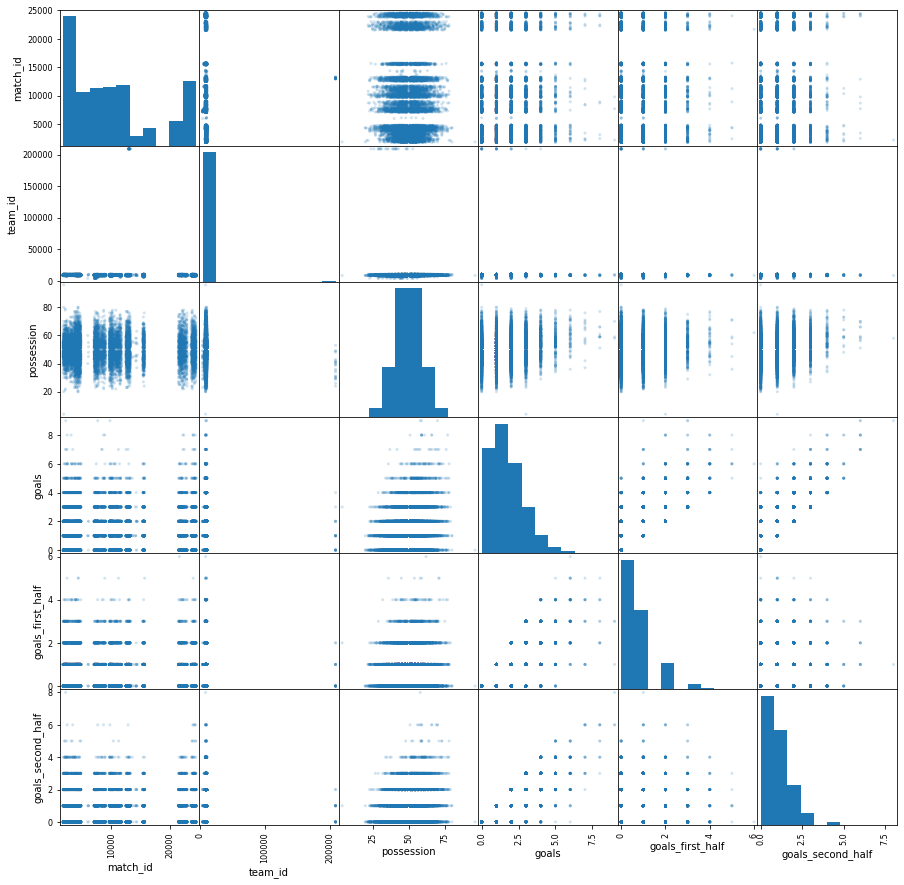

In [305]:
pd.plotting.scatter_matrix(df_goals_statistics, alpha=0.2,figsize=(15,15))                              

In [306]:
df_goals_statistics

,match_id,team_id,possession,goals,goals_first_half,goals_second_half
0,1729.0,10261.0,45.0,1.0,1.0,0.0
1,1729.0,10260.0,55.0,1.0,1.0,0.0
2,1730.0,9825.0,66.0,1.0,1.0,0.0
3,1730.0,8659.0,34.0,0.0,0.0,0.0
4,1731.0,8650.0,54.0,1.0,0.0,1.0
...,...,...,...,...,...,...
11135,24424.0,9869.0,48.0,0.0,0.0,0.0
11136,24459.0,8560.0,57.0,0.0,0.0,0.0
11137,24459.0,10205.0,43.0,0.0,0.0,0.0
11138,24524.0,8560.0,51.0,0.0,0.0,0.0


In [307]:
df_shots_statistics['goals'] = df_goals_statistics['goals']
df_shots_statistics['goals_first_half'] = df_goals_statistics['goals_first_half']
df_shots_statistics['goals_second_half'] = df_goals_statistics['goals_second_half']
df_shots_statistics.to_csv('statistics_no_tie_matches.csv')